## Learning Objectives

After reading this notebook, students will be able to:

1. Implement the SVM for Non separable case using Kernels.
2. Implement the SVM for Non Separable case with slack variables.

# 1. Visualizing Non-Linearly Separable data (Concentric Circles)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets


In the below example, we generate a circle dataset that we have seen in the kernel chapter. We will try to draw a decision boundary in that circle dataset.

In [2]:
features, labels = datasets.make_circles(100,
                                         noise=0.05,
                                         random_state=17,
                                         factor=0.5)

colors = ['r' if _labels == 0 else 'b' for _labels in labels] # blue positive class and red negative class


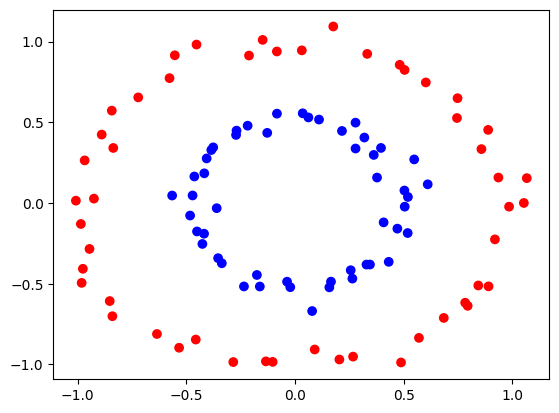

In [3]:
plt.scatter(features[:, 0], features[:, 1], c=colors) # data points plot
plt.show()

# 2. SVM with RBF Kernel on make_circles

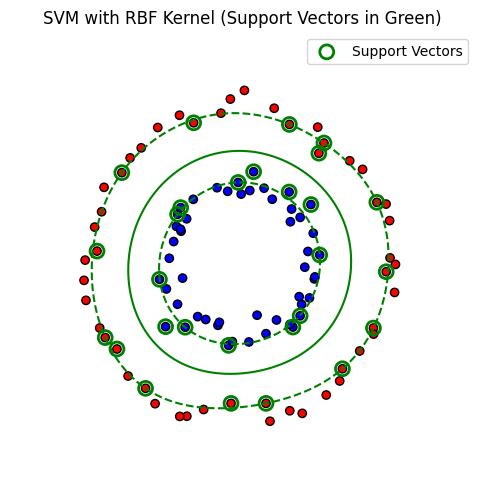

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC

X, y = make_circles(n_samples=100, factor=0.5, noise=0.05) # synthetic non-linear data

clf = SVC(kernel='rbf', C=1.0) # SVM RBF Kernel
clf.fit(X, y)

xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 500),
                     np.linspace(-1.5, 1.5, 500)) # mesh grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6, 6))
plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='green') # decision boundary and margin

colors = ['red' if label == 0 else 'blue' for label in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolors='k') # data points

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='green', linewidths=2, label='Support Vectors')

plt.title("SVM with RBF Kernel (Support Vectors in Green)")
plt.axis('equal')
plt.axis('off')
plt.legend()
plt.show()


### Function to Plot Decision Boundary

In [5]:
def plot_decision_boundary(model, ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # model evaluation with grid
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    ax.contour(X, Y, P, colors='#006400',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

#  3. SVM with Polynomial Kernel (Degree 2)

Sklearn provides a SVM module that contains all the linear and non-linear support vector machines. We will use __sklearn.svm.SVC__ class to classify our data. You can learn more about SVC from [here.](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)



In [6]:
from sklearn.svm import SVC

We will draw a decision boundary using SVM with a polynomial kernel of degree 2.

In [7]:
model = SVC(kernel='poly', degree=2)  # polynomial kernel of degree 2
model.fit(features, labels)

,C,1.0
,kernel,'poly'
,degree,2
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


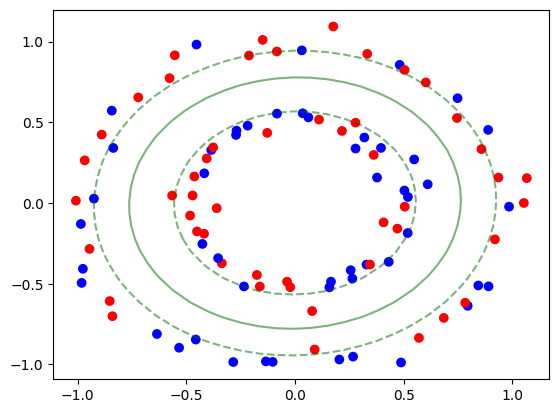

In [8]:
plt.scatter(features[:, 0], features[:, 1], c=colors)
plot_decision_boundary(model)
plt.show()


The plot above shows the decision boundary our SVM classifier learned with the training data. We have used a polynomial kernel of degree 2, which can learn quadratic functions like circle, ellipse, and parabola. With a polynomial kernel, a simple linear model has learned to find a nonlinear decision boundary. This is the powerful feature of SVM that made it applicable to many different problems.

Now, we will see the number and the indices of the support vector.


In [9]:
model.n_support_ # number of support vector

array([7, 6], dtype=int32)

In [10]:
model.support_ # indices of support vector

array([46, 66, 71, 79, 82, 97, 99, 20, 29, 31, 36, 40, 60], dtype=int32)

We studied that the indices of support vectors are never zero in the previous sections. Here is a practical demo of it.

In [11]:
model.support_vectors_

array([[-0.92471076,  0.02713265],
       [-0.08328664,  0.93829021],
       [ 0.74515983,  0.52625083],
       [ 0.09073481, -0.90708293],
       [ 0.8576866 ,  0.3337843 ],
       [-0.83589622,  0.34089471],
       [-0.21146497,  0.91310693],
       [ 0.07895556, -0.6690099 ],
       [ 0.54836916,  0.26992425],
       [ 0.43123107, -0.36434417],
       [ 0.27856545,  0.49758226],
       [ 0.61055432,  0.11559977],
       [-0.56498744,  0.04626758]])

# SVM with Linear Kernel (Varying C Parameter)

The above visualization shows a data with overlapping. In such case we introduce the parameter $C$. The hardness of margin is controlled by tuning the $C$ parameter.

Here. we are using the value of $C \ \text{as} \ 10$. You can tune it by replacing the value and see its effect.

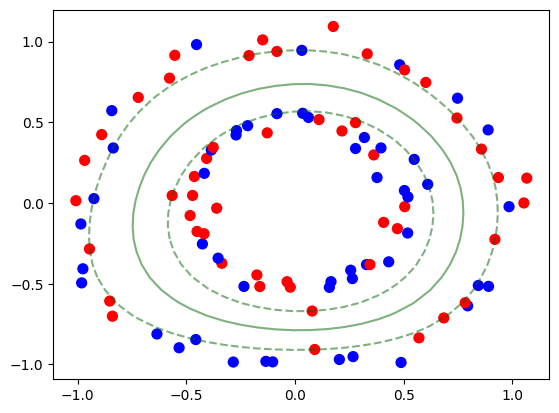

In [14]:
model_1 = SVC(C=10)
model_1.fit(features, labels) # SVM model with the C parameter

plt.scatter(features[:, 0], features[:, 1], c=colors, s=50)
plot_decision_boundary(model_1)
plt.show()

Alright! In the above visual picture shows the decision boundary separating the two groups of data.

In [15]:
model_1.n_support_ # number of support vectors

array([10,  4], dtype=int32)

In [16]:
model_1.support_ # indices of support vectors

array([ 5, 22, 43, 46, 53, 66, 71, 79, 97, 99, 20, 29, 56, 60],
      dtype=int32)

In [17]:
model_1.support_vectors_ # ndarray of support vectors

array([[-0.45628279, -0.84555684],
       [ 0.91973632, -0.22528637],
       [ 0.03152267,  0.9451451 ],
       [-0.92471076,  0.02713265],
       [ 0.68449195, -0.71164633],
       [-0.08328664,  0.93829021],
       [ 0.74515983,  0.52625083],
       [ 0.09073481, -0.90708293],
       [-0.83589622,  0.34089471],
       [-0.21146497,  0.91310693],
       [ 0.07895556, -0.6690099 ],
       [ 0.54836916,  0.26992425],
       [-0.08294734,  0.55326489],
       [-0.56498744,  0.04626758]])

## Conclusion

In this section, we learnt to implement SVM models using linear, polynomial and RBF kernel to separate non linear data.
